[scipy stats docs](https://docs.scipy.org/doc/scipy/reference/stats.html)

[numpy stats docs](https://numpy.org/doc/stable/reference/routines.statistics.html)

[tutorial](https://www.tutorialspoint.com/scipy/scipy_stats.htm)

In [2]:
import scipy.stats as st
import numpy as np

import matplotlib.pyplot as plt

**Statistics review**
- https://stanford.edu/~shervine/teaching/cme-106/cheatsheet-probability
- https://www.dummies.com/education/math/probability/probability-for-dummies-cheat-sheet/
- https://web.mit.edu/~csvoss/Public/usabo/stats_handout.pdf
- https://www.stat.auckland.ac.nz/~fewster/325/notes/ch3.pdf

In [3]:
X = np.array(
    [[1, 2, 3],
    [4, 5, 6]],
)

print(np.mean(X))
print(np.mean(X, axis = 0)) # Mean over cols
print(np.mean(X, axis = 1)) # Mean over rows
print()
print(np.std(X))
print(np.std(X, axis = 0)) # std over cols
print(np.std(X, axis = 1)) # std over rows

print()
print(np.var(X))
print(np.var(X, axis=0))
print(np.var(X, axis=1))

3.5
[2.5 3.5 4.5]
[2. 5.]

1.707825127659933
[1.5 1.5 1.5]
[0.81649658 0.81649658]

2.9166666666666665
[2.25 2.25 2.25]
[0.66666667 0.66666667]


In [4]:
np.var(X) == np.std(X) ** 2

True

In [5]:
# Variance with formula

print(np.sum((X - np.mean(X, axis = 0))**2, axis = 0) / len(X))
print(np.sum((X.T - np.mean(X, axis = 1))**2, axis = 0) / len(X[0]))

[2.25 2.25 2.25]
[0.66666667 0.66666667]


In [6]:
np.cov(X)

array([[1., 1.],
       [1., 1.]])

# Distributions

## Numpy module
- https://numpy.org/doc/1.16/reference/routines.random.html

## Base classes -- Scipy

3 base classes, `rv_continuous`, `rv_discrete` and `rv_histogram`

### `rv_continuous`

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous

In [2]:
class gaussian_gen(st.rv_continuous):

    "Gaussian distribution"

    def _pdf(self, x):


        return np.exp(-x**2 / 2.) / np.sqrt(2.0 * np.pi)
gaussian = gaussian_gen(name='gaussian')

In [3]:
gaussian.cdf(0)

0.4999999999999999

### `rv_discrete`

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html#scipy.stats.rv_discrete

[0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2]
Probability mass:  [0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2]
Cumulative distribution:  [0.1, 0.30000000000000004, 0.6000000000000001, 0.7000000000000001, 0.8, 0.8, 1.0]



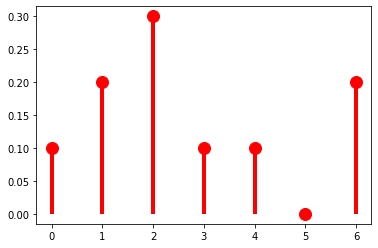

In [4]:
# Create discrete distribution
xk = np.arange(7)
pk = [0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2]
dist = st.rv_discrete(name='custm', values=(xk, pk))

print(pk)
print("Probability mass: ", [dist.pmf(x) for x in xk]) # probability of the value
print("Cumulative distribution: ", [dist.cdf(x) for x in xk])
print()
# Plot
fig, ax = plt.subplots(1, 1)
ax.plot(xk, dist.pmf(xk), 'ro', ms=12, mec='r') 
ax.vlines(xk, 0, dist.pmf(xk), colors='r', lw=4) 
plt.show()

In [5]:
dist.mean(), dist.std(), dist.var()

(2.7, 1.9519221295943132, 3.8099999999999987)

## Continuous distributions

### Uniform distribution

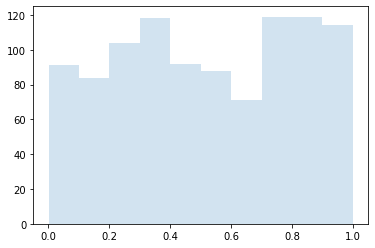

np.mean(X) = 0.5171599769479024
0.2932828369976486


In [43]:
# Numpy

X = np.random.uniform(low = 0, high = 1, size = 1000)
plt.hist(X, alpha = .2)
plt.show()

print(f"{np.mean(X) = }")
print(f"{np.std(X) = }")

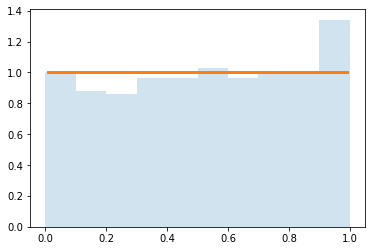

In [7]:
##Scipy

num_samples = 1000
x = np.linspace(st.uniform.ppf(0.01), st.uniform.ppf(0.99), 100)
p = st.uniform.pdf(x) # everything has prob 1
samples = [st.uniform.rvs() for _ in range(num_samples)] # sample 

plt.hist(samples, density=True, alpha = .2)
plt.plot(x, p, linewidth = 3)
plt.show()



### Gaussian

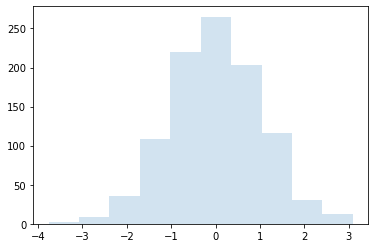

In [34]:
# Numpy

X = np.random.normal(loc = 0, scale = 1, size = 1000)
plt.hist(X, alpha = .2)
plt.show()

In [70]:
st.norm.ppf(0.01), st.norm.ppf(0.99)

(-2.3263478740408408, 2.3263478740408408)

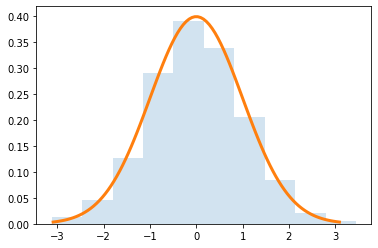

In [93]:
# Scipy

x = np.linspace(st.norm.ppf(0.001), st.norm.ppf(0.999), 100)
y = st.norm.pdf(x)
samples = [st.norm.rvs() for _ in range(num_samples)] # sample 
plt.hist(samples, density=True, alpha = .2)
plt.plot(x, y, linewidth = 3)
plt.show()


## Discrete distributions

### Bernoulli

Probability mass function:

$$f(k) = \begin{cases}
1 - p & \text{ if } k = 0 \\
p & \text{ if } k = 1
\end{cases}$$
for $k \in {0, 1}, 0 \leq p \leq 1$

In [102]:
p = .3
mean, var = st.bernoulli.stats(p, moments = 'mv')
print(f"{mean = }\n{var = }")

mean = array(0.3)
var = array(0.21)


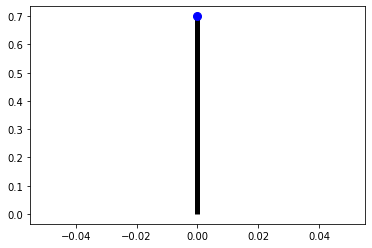

In [134]:
x = np.arange(st.bernoulli.ppf(0.01, p), st.bernoulli.ppf(0.99, p))
y = st.bernoulli.pmf(x, p)
samples = [st.bernoulli.rvs(p) for _ in range(num_samples)] # sample 
plt.plot(x, y, 'bo', ms = 8)
plt.vlines(x, 0, y, color = 'k', linestyles = '-', lw = 5)
#plt.plot(x, y, linewidth = 3)
plt.show()

### Geometric

Probability mass function:
$$f(k) = (1 - p)^{k-1}p$$
for $k \geq 1, 0 \leq p \leq 1$. $p$ is the probability of a single success

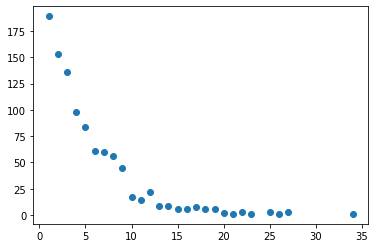

np.mean(X) = 5.095
np.std(X) = 4.513310868974129


In [77]:
## Numpy

X = np.random.geometric(p = .2, size = 1000) # p = probability of success

values, counts= np.unique(X, return_counts=True)
plt.scatter(values, counts)
plt.show()
print(f"{np.mean(X) = }")
print(f"{np.std(X) = }")

### Binomial

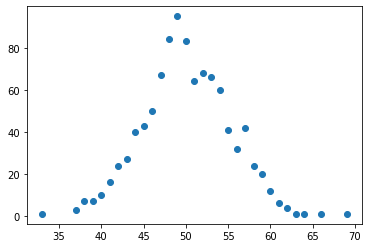

np.mean(X) = 50.036
np.std(X) = 4.991863780192725


In [54]:
n, p = 100, .5  # number of trials, probability of each trial
X = np.random.binomial(n, p, 1000)

values, counts= np.unique(X, return_counts=True)
plt.scatter(values, counts)
plt.show()
print(f"{np.mean(X) = }")
print(f"{np.std(X) = }")

### Poisson

In [69]:
X = np.random.poisson(lam = 50, size =  1000)

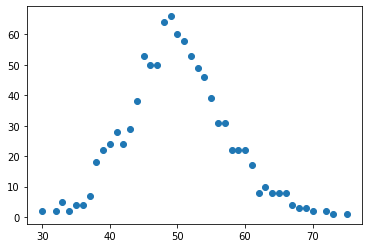

np.mean(X) = 49.989
np.std(X) = 7.093016213149382


In [70]:
values, counts= np.unique(X, return_counts=True)
plt.scatter(values, counts)
plt.show()
print(f"{np.mean(X) = }")
print(f"{np.std(X) = }")